In [48]:
#Imports and settings

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import tensorflow as tf
import tensorflow_addons as tfa
from tqdm.notebook import tqdm


from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

In [36]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1

print(ytrain.shape)
print(ytest.shape)

(7352,)
(2947,)


In [62]:
# load the x,y,z accelerations for the three data streams for each coordinate - test
xx=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
xxt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_x_test.txt')
yyt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_y_test.txt')
zzt=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/total_acc_z_test.txt')
xxg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_x_test.txt')
yyg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_y_test.txt')
zzg=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_gyro_z_test.txt')
print(xx.shape)
print(xxg.shape)

(2947, 128)
(2947, 128)


In [38]:
# concatenate into a single (n,128,9) array
xtest = np.concatenate((xx[:,:,None],yy[:,:,None],zz[:,:,None],
                        xxt[:,:,None],yyt[:,:,None],zzt[:,:,None],
                        xxg[:,:,None],yyg[:,:,None],zzg[:,:,None]),axis=2)

In [59]:
# load the x,y,z accelerations for the three data streams for each coordinate - train

xx_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xxt_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_x_train.txt')
yyt_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_y_train.txt')
zzt_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/total_acc_z_train.txt')
xxg_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_x_train.txt')
yyg_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_y_train.txt')
zzg_t=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_gyro_z_train.txt')

(7352, 128)


In [40]:
# concatenate into a single (n,128,9) array
xtrain = np.concatenate((xx_t[:,:,None],yy_t[:,:,None],zz_t[:,:,None],
                        xxt_t[:,:,None],yyt_t[:,:,None],zzt_t[:,:,None],
                        xxg_t[:,:,None],yyg_t[:,:,None],zzg_t[:,:,None]),axis=2)

In [41]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(7352, 128, 9)
(7352,)
(2947, 128, 9)
(2947,)


In [18]:
x_input, x_val, y_input, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)

#one-hot encoding for labels
y_input = tf.keras.utils.to_categorical(y_input)
y_val = tf.keras.utils.to_categorical(y_val)

x_input = tf.convert_to_tensor(x_input, tf.float32)
x_val = tf.convert_to_tensor(x_val, tf.float32)
y_input = tf.convert_to_tensor(y_input, tf.float32)
y_val = tf.convert_to_tensor(y_val, tf.float32)
print(x_val.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(1471, 128, 9)
(2947, 128, 9)
(5881, 6)
(1471, 6)


# Part 3
### Using the best architecture from part 2, we have extra dimensions

In [19]:
#tensorboad set up
logdir = '/home/jovyan/logs/Project/Part3'

In [20]:
# Keras API model

#We create the input layer and combine with further dense layers,
input_layer = tf.keras.Input(shape=(128, 9))
output_layer = tf.keras.layers.Conv1D(filters=128, kernel_size=16)(input_layer)
output_layer = tf.keras.layers.BatchNormalization()(output_layer)
output_layer = tf.keras.layers.Dense(64, activation='relu')(output_layer)
output_layer = tf.keras.layers.GlobalAveragePooling1D()(output_layer)

# # Add a softmax layer with  output units:
output_layer = tf.keras.layers.Dense(6, activation='softmax')(output_layer)

model = tf.keras.Model(inputs=input_layer,outputs=output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 9)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 113, 128)          18560     
                                                                 
 batch_normalization_2 (Batc  (None, 113, 128)         512       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 113, 64)           8256      
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 6)                 390 

In [21]:
# Compile model

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs
early_stopping_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)]
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()


#The compilation and training then proceeds as per the sequential model,
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
        loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.fit(x_input, y_input, 
          epochs=200, 
          batch_size=128,
          validation_data=(x_val, y_val),
          callbacks=[tensorboard_callback, tqdm_callback, early_stopping_callbacks]
         )

Training:   0%|           0/200 ETA: ?s,  ?epochs/s

Epoch 1/200


0/46           ETA: ?s - 

Epoch 1/200
46/46 [==============================] - 1s 16ms/step - loss: 0.6483 - accuracy: 0.8249 - val_loss: 1.5235 - val_accuracy: 0.3379
Epoch 2/200


0/46           ETA: ?s - 

Epoch 2/200
46/46 [==============================] - 1s 11ms/step - loss: 0.2415 - accuracy: 0.9356 - val_loss: 1.1921 - val_accuracy: 0.4514
Epoch 3/200


0/46           ETA: ?s - 

Epoch 3/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1816 - accuracy: 0.9427 - val_loss: 0.8021 - val_accuracy: 0.7158
Epoch 4/200


0/46           ETA: ?s - 

Epoch 4/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1503 - accuracy: 0.9488 - val_loss: 0.5022 - val_accuracy: 0.8980
Epoch 5/200


0/46           ETA: ?s - 

Epoch 5/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1384 - accuracy: 0.9495 - val_loss: 0.3512 - val_accuracy: 0.9279
Epoch 6/200


0/46           ETA: ?s - 

Epoch 6/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1316 - accuracy: 0.9526 - val_loss: 0.2229 - val_accuracy: 0.9558
Epoch 7/200


0/46           ETA: ?s - 

Epoch 7/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1240 - accuracy: 0.9563 - val_loss: 0.1777 - val_accuracy: 0.9463
Epoch 8/200


0/46           ETA: ?s - 

Epoch 8/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1238 - accuracy: 0.9534 - val_loss: 0.1694 - val_accuracy: 0.9381
Epoch 9/200


0/46           ETA: ?s - 

Epoch 9/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1178 - accuracy: 0.9522 - val_loss: 0.1292 - val_accuracy: 0.9538
Epoch 10/200


0/46           ETA: ?s - 

Epoch 10/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1162 - accuracy: 0.9537 - val_loss: 0.1232 - val_accuracy: 0.9511
Epoch 11/200


0/46           ETA: ?s - 

Epoch 11/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1113 - accuracy: 0.9522 - val_loss: 0.1848 - val_accuracy: 0.9171
Epoch 12/200


0/46           ETA: ?s - 

Epoch 12/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1121 - accuracy: 0.9577 - val_loss: 0.1331 - val_accuracy: 0.9429
Epoch 13/200


0/46           ETA: ?s - 

Epoch 13/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1134 - accuracy: 0.9520 - val_loss: 0.1202 - val_accuracy: 0.9490
Epoch 14/200


0/46           ETA: ?s - 

Epoch 14/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1080 - accuracy: 0.9548 - val_loss: 0.1114 - val_accuracy: 0.9517
Epoch 15/200


0/46           ETA: ?s - 

Epoch 15/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1068 - accuracy: 0.9568 - val_loss: 0.1130 - val_accuracy: 0.9565
Epoch 16/200


0/46           ETA: ?s - 

Epoch 16/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1045 - accuracy: 0.9548 - val_loss: 0.1117 - val_accuracy: 0.9524
Epoch 17/200


0/46           ETA: ?s - 

Epoch 17/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1032 - accuracy: 0.9553 - val_loss: 0.1542 - val_accuracy: 0.9341
Epoch 18/200


0/46           ETA: ?s - 

Epoch 18/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1005 - accuracy: 0.9592 - val_loss: 0.1309 - val_accuracy: 0.9477
Epoch 19/200


0/46           ETA: ?s - 

Epoch 19/200
46/46 [==============================] - 0s 10ms/step - loss: 0.1050 - accuracy: 0.9556 - val_loss: 0.1756 - val_accuracy: 0.9245
Epoch 20/200


0/46           ETA: ?s - 

Epoch 20/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0991 - accuracy: 0.9572 - val_loss: 0.1036 - val_accuracy: 0.9565
Epoch 21/200


0/46           ETA: ?s - 

Epoch 21/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0988 - accuracy: 0.9563 - val_loss: 0.1081 - val_accuracy: 0.9531
Epoch 22/200


0/46           ETA: ?s - 

Epoch 22/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0999 - accuracy: 0.9566 - val_loss: 0.1285 - val_accuracy: 0.9511
Epoch 23/200


0/46           ETA: ?s - 

Epoch 23/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0972 - accuracy: 0.9597 - val_loss: 0.1137 - val_accuracy: 0.9517
Epoch 24/200


0/46           ETA: ?s - 

Epoch 24/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0963 - accuracy: 0.9589 - val_loss: 0.0996 - val_accuracy: 0.9565
Epoch 25/200


0/46           ETA: ?s - 

Epoch 25/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0932 - accuracy: 0.9604 - val_loss: 0.1244 - val_accuracy: 0.9456
Epoch 26/200


0/46           ETA: ?s - 

Epoch 26/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0929 - accuracy: 0.9587 - val_loss: 0.1152 - val_accuracy: 0.9436
Epoch 27/200


0/46           ETA: ?s - 

Epoch 27/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0895 - accuracy: 0.9609 - val_loss: 0.0952 - val_accuracy: 0.9626
Epoch 28/200


0/46           ETA: ?s - 

Epoch 28/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0884 - accuracy: 0.9607 - val_loss: 0.1223 - val_accuracy: 0.9477
Epoch 29/200


0/46           ETA: ?s - 

Epoch 29/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0884 - accuracy: 0.9612 - val_loss: 0.0970 - val_accuracy: 0.9524
Epoch 30/200


0/46           ETA: ?s - 

Epoch 30/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0882 - accuracy: 0.9617 - val_loss: 0.1029 - val_accuracy: 0.9531
Epoch 31/200


0/46           ETA: ?s - 

Epoch 31/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0901 - accuracy: 0.9599 - val_loss: 0.1084 - val_accuracy: 0.9599
Epoch 32/200


0/46           ETA: ?s - 

Epoch 32/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0859 - accuracy: 0.9653 - val_loss: 0.0999 - val_accuracy: 0.9606
Epoch 33/200


0/46           ETA: ?s - 

Epoch 33/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0862 - accuracy: 0.9634 - val_loss: 0.1035 - val_accuracy: 0.9545
Epoch 34/200


0/46           ETA: ?s - 

Epoch 34/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0825 - accuracy: 0.9650 - val_loss: 0.1019 - val_accuracy: 0.9545
Epoch 35/200


0/46           ETA: ?s - 

Epoch 35/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0846 - accuracy: 0.9645 - val_loss: 0.0996 - val_accuracy: 0.9606
Epoch 36/200


0/46           ETA: ?s - 

Epoch 36/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0835 - accuracy: 0.9641 - val_loss: 0.0864 - val_accuracy: 0.9613
Epoch 37/200


0/46           ETA: ?s - 

Epoch 37/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0878 - accuracy: 0.9604 - val_loss: 0.1344 - val_accuracy: 0.9388
Epoch 38/200


0/46           ETA: ?s - 

Epoch 38/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0826 - accuracy: 0.9646 - val_loss: 0.2093 - val_accuracy: 0.9143
Epoch 39/200


0/46           ETA: ?s - 

Epoch 39/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0864 - accuracy: 0.9612 - val_loss: 0.0866 - val_accuracy: 0.9599
Epoch 40/200


0/46           ETA: ?s - 

Epoch 40/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9665 - val_loss: 0.1202 - val_accuracy: 0.9517
Epoch 41/200


0/46           ETA: ?s - 

Epoch 41/200
46/46 [==============================] - 0s 11ms/step - loss: 0.0810 - accuracy: 0.9657 - val_loss: 0.0985 - val_accuracy: 0.9579
Epoch 42/200


0/46           ETA: ?s - 

Epoch 42/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0746 - accuracy: 0.9675 - val_loss: 0.0878 - val_accuracy: 0.9579
Epoch 43/200


0/46           ETA: ?s - 

Epoch 43/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0761 - accuracy: 0.9657 - val_loss: 0.1822 - val_accuracy: 0.9232
Epoch 44/200


0/46           ETA: ?s - 

Epoch 44/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0768 - accuracy: 0.9653 - val_loss: 0.0941 - val_accuracy: 0.9585
Epoch 45/200


0/46           ETA: ?s - 

Epoch 45/200
46/46 [==============================] - 0s 11ms/step - loss: 0.0825 - accuracy: 0.9648 - val_loss: 0.0969 - val_accuracy: 0.9606
Epoch 46/200


0/46           ETA: ?s - 

Epoch 46/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0743 - accuracy: 0.9691 - val_loss: 0.1224 - val_accuracy: 0.9524
Epoch 47/200


0/46           ETA: ?s - 

Epoch 47/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0741 - accuracy: 0.9684 - val_loss: 0.1089 - val_accuracy: 0.9517
Epoch 48/200


0/46           ETA: ?s - 

Epoch 48/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0740 - accuracy: 0.9697 - val_loss: 0.0951 - val_accuracy: 0.9619
Epoch 49/200


0/46           ETA: ?s - 

Epoch 49/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0782 - accuracy: 0.9648 - val_loss: 0.0860 - val_accuracy: 0.9619
Epoch 50/200


0/46           ETA: ?s - 

Epoch 50/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0732 - accuracy: 0.9687 - val_loss: 0.0985 - val_accuracy: 0.9599
Epoch 51/200


0/46           ETA: ?s - 

Epoch 51/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0731 - accuracy: 0.9674 - val_loss: 0.0923 - val_accuracy: 0.9640
Epoch 52/200


0/46           ETA: ?s - 

Epoch 52/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0730 - accuracy: 0.9716 - val_loss: 0.0936 - val_accuracy: 0.9613
Epoch 53/200


0/46           ETA: ?s - 

Epoch 53/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0726 - accuracy: 0.9696 - val_loss: 0.0820 - val_accuracy: 0.9660
Epoch 54/200


0/46           ETA: ?s - 

Epoch 54/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0716 - accuracy: 0.9701 - val_loss: 0.0886 - val_accuracy: 0.9592
Epoch 55/200


0/46           ETA: ?s - 

Epoch 55/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0735 - accuracy: 0.9685 - val_loss: 0.0822 - val_accuracy: 0.9640
Epoch 56/200


0/46           ETA: ?s - 

Epoch 56/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0716 - accuracy: 0.9689 - val_loss: 0.0908 - val_accuracy: 0.9606
Epoch 57/200


0/46           ETA: ?s - 

Epoch 57/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0687 - accuracy: 0.9711 - val_loss: 0.0807 - val_accuracy: 0.9646
Epoch 58/200


0/46           ETA: ?s - 

Epoch 58/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0684 - accuracy: 0.9702 - val_loss: 0.0776 - val_accuracy: 0.9592
Epoch 59/200


0/46           ETA: ?s - 

Epoch 59/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0658 - accuracy: 0.9704 - val_loss: 0.0855 - val_accuracy: 0.9687
Epoch 60/200


0/46           ETA: ?s - 

Epoch 60/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0690 - accuracy: 0.9697 - val_loss: 0.0755 - val_accuracy: 0.9660
Epoch 61/200


0/46           ETA: ?s - 

Epoch 61/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0702 - accuracy: 0.9694 - val_loss: 0.0864 - val_accuracy: 0.9633
Epoch 62/200


0/46           ETA: ?s - 

Epoch 62/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0685 - accuracy: 0.9731 - val_loss: 0.0688 - val_accuracy: 0.9742
Epoch 63/200


0/46           ETA: ?s - 

Epoch 63/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0650 - accuracy: 0.9714 - val_loss: 0.0628 - val_accuracy: 0.9708
Epoch 64/200


0/46           ETA: ?s - 

Epoch 64/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0671 - accuracy: 0.9714 - val_loss: 0.1024 - val_accuracy: 0.9517
Epoch 65/200


0/46           ETA: ?s - 

Epoch 65/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0678 - accuracy: 0.9735 - val_loss: 0.1525 - val_accuracy: 0.9239
Epoch 66/200


0/46           ETA: ?s - 

Epoch 66/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0630 - accuracy: 0.9719 - val_loss: 0.0767 - val_accuracy: 0.9687
Epoch 67/200


0/46           ETA: ?s - 

Epoch 67/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0640 - accuracy: 0.9704 - val_loss: 0.0747 - val_accuracy: 0.9646
Epoch 68/200


0/46           ETA: ?s - 

Epoch 68/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0641 - accuracy: 0.9740 - val_loss: 0.0717 - val_accuracy: 0.9694
Epoch 69/200


0/46           ETA: ?s - 

Epoch 69/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0647 - accuracy: 0.9721 - val_loss: 0.0733 - val_accuracy: 0.9646
Epoch 70/200


0/46           ETA: ?s - 

Epoch 70/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0603 - accuracy: 0.9745 - val_loss: 0.0661 - val_accuracy: 0.9680
Epoch 71/200


0/46           ETA: ?s - 

Epoch 71/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0639 - accuracy: 0.9730 - val_loss: 0.0757 - val_accuracy: 0.9660
Epoch 72/200


0/46           ETA: ?s - 

Epoch 72/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0635 - accuracy: 0.9738 - val_loss: 0.0687 - val_accuracy: 0.9755
Epoch 73/200


0/46           ETA: ?s - 

Epoch 73/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0619 - accuracy: 0.9733 - val_loss: 0.0748 - val_accuracy: 0.9660
Epoch 74/200


0/46           ETA: ?s - 

Epoch 74/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0615 - accuracy: 0.9745 - val_loss: 0.0819 - val_accuracy: 0.9653
Epoch 75/200


0/46           ETA: ?s - 

Epoch 75/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0568 - accuracy: 0.9776 - val_loss: 0.0587 - val_accuracy: 0.9714
Epoch 76/200


0/46           ETA: ?s - 

Epoch 76/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0618 - accuracy: 0.9723 - val_loss: 0.0906 - val_accuracy: 0.9606
Epoch 77/200


0/46           ETA: ?s - 

Epoch 77/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0636 - accuracy: 0.9725 - val_loss: 0.0724 - val_accuracy: 0.9694
Epoch 78/200


0/46           ETA: ?s - 

Epoch 78/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0592 - accuracy: 0.9750 - val_loss: 0.1231 - val_accuracy: 0.9449
Epoch 79/200


0/46           ETA: ?s - 

Epoch 79/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0595 - accuracy: 0.9738 - val_loss: 0.0701 - val_accuracy: 0.9680
Epoch 80/200


0/46           ETA: ?s - 

Epoch 80/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0565 - accuracy: 0.9765 - val_loss: 0.0614 - val_accuracy: 0.9735
Epoch 81/200


0/46           ETA: ?s - 

Epoch 81/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0600 - accuracy: 0.9740 - val_loss: 0.0644 - val_accuracy: 0.9721
Epoch 82/200


0/46           ETA: ?s - 

Epoch 82/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0579 - accuracy: 0.9755 - val_loss: 0.0664 - val_accuracy: 0.9728
Epoch 83/200


0/46           ETA: ?s - 

Epoch 83/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0556 - accuracy: 0.9774 - val_loss: 0.0811 - val_accuracy: 0.9592
Epoch 84/200


0/46           ETA: ?s - 

Epoch 84/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0559 - accuracy: 0.9770 - val_loss: 0.0626 - val_accuracy: 0.9714
Epoch 85/200


0/46           ETA: ?s - 

Epoch 85/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0551 - accuracy: 0.9789 - val_loss: 0.0639 - val_accuracy: 0.9694
Epoch 86/200


0/46           ETA: ?s - 

Epoch 86/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0603 - accuracy: 0.9725 - val_loss: 0.0649 - val_accuracy: 0.9708
Epoch 87/200


0/46           ETA: ?s - 

Epoch 87/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0557 - accuracy: 0.9762 - val_loss: 0.0798 - val_accuracy: 0.9606
Epoch 88/200


0/46           ETA: ?s - 

Epoch 88/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0535 - accuracy: 0.9782 - val_loss: 0.0670 - val_accuracy: 0.9708
Epoch 89/200


0/46           ETA: ?s - 

Epoch 89/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0560 - accuracy: 0.9769 - val_loss: 0.0655 - val_accuracy: 0.9680
Epoch 90/200


0/46           ETA: ?s - 

Epoch 90/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0600 - accuracy: 0.9767 - val_loss: 0.0815 - val_accuracy: 0.9626
Epoch 91/200


0/46           ETA: ?s - 

Epoch 91/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0560 - accuracy: 0.9767 - val_loss: 0.0635 - val_accuracy: 0.9694
Epoch 92/200


0/46           ETA: ?s - 

Epoch 92/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0512 - accuracy: 0.9798 - val_loss: 0.0571 - val_accuracy: 0.9714
Epoch 93/200


0/46           ETA: ?s - 

Epoch 93/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0545 - accuracy: 0.9776 - val_loss: 0.0740 - val_accuracy: 0.9687
Epoch 94/200


0/46           ETA: ?s - 

Epoch 94/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0494 - accuracy: 0.9799 - val_loss: 0.0637 - val_accuracy: 0.9735
Epoch 95/200


0/46           ETA: ?s - 

Epoch 95/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0503 - accuracy: 0.9794 - val_loss: 0.0650 - val_accuracy: 0.9708
Epoch 96/200


0/46           ETA: ?s - 

Epoch 96/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9811 - val_loss: 0.0581 - val_accuracy: 0.9708
Epoch 97/200


0/46           ETA: ?s - 

Epoch 97/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0528 - accuracy: 0.9769 - val_loss: 0.1606 - val_accuracy: 0.9395
Epoch 98/200


0/46           ETA: ?s - 

Epoch 98/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0579 - accuracy: 0.9759 - val_loss: 0.1086 - val_accuracy: 0.9572
Epoch 99/200


0/46           ETA: ?s - 

Epoch 99/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0503 - accuracy: 0.9791 - val_loss: 0.0743 - val_accuracy: 0.9667
Epoch 100/200


0/46           ETA: ?s - 

Epoch 100/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0511 - accuracy: 0.9787 - val_loss: 0.1157 - val_accuracy: 0.9592
Epoch 101/200


0/46           ETA: ?s - 

Epoch 101/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9777 - val_loss: 0.0752 - val_accuracy: 0.9674
Epoch 102/200


0/46           ETA: ?s - 

Epoch 102/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0509 - accuracy: 0.9784 - val_loss: 0.0716 - val_accuracy: 0.9728
Epoch 103/200


0/46           ETA: ?s - 

Epoch 103/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0514 - accuracy: 0.9779 - val_loss: 0.0656 - val_accuracy: 0.9674
Epoch 104/200


0/46           ETA: ?s - 

Epoch 104/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0515 - accuracy: 0.9801 - val_loss: 0.0725 - val_accuracy: 0.9646
Epoch 105/200


0/46           ETA: ?s - 

Epoch 105/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0503 - accuracy: 0.9794 - val_loss: 0.0835 - val_accuracy: 0.9633
Epoch 106/200


0/46           ETA: ?s - 

Epoch 106/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0516 - accuracy: 0.9776 - val_loss: 0.0715 - val_accuracy: 0.9660
Epoch 107/200


0/46           ETA: ?s - 

Epoch 107/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0500 - accuracy: 0.9793 - val_loss: 0.0799 - val_accuracy: 0.9660
Epoch 108/200


0/46           ETA: ?s - 

Epoch 108/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0498 - accuracy: 0.9794 - val_loss: 0.0941 - val_accuracy: 0.9619
Epoch 109/200


0/46           ETA: ?s - 

Epoch 109/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0452 - accuracy: 0.9813 - val_loss: 0.0530 - val_accuracy: 0.9748
Epoch 110/200


0/46           ETA: ?s - 

Epoch 110/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0482 - accuracy: 0.9803 - val_loss: 0.0580 - val_accuracy: 0.9748
Epoch 111/200


0/46           ETA: ?s - 

Epoch 111/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0513 - accuracy: 0.9787 - val_loss: 0.0554 - val_accuracy: 0.9742
Epoch 112/200


0/46           ETA: ?s - 

Epoch 112/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0450 - accuracy: 0.9827 - val_loss: 0.0710 - val_accuracy: 0.9694
Epoch 113/200


0/46           ETA: ?s - 

Epoch 113/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9764 - val_loss: 0.2733 - val_accuracy: 0.9171
Epoch 114/200


0/46           ETA: ?s - 

Epoch 114/200
46/46 [==============================] - 0s 11ms/step - loss: 0.0497 - accuracy: 0.9798 - val_loss: 0.0551 - val_accuracy: 0.9735
Epoch 115/200


0/46           ETA: ?s - 

Epoch 115/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0478 - accuracy: 0.9798 - val_loss: 0.0516 - val_accuracy: 0.9789
Epoch 116/200


0/46           ETA: ?s - 

Epoch 116/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0413 - accuracy: 0.9835 - val_loss: 0.0612 - val_accuracy: 0.9708
Epoch 117/200


0/46           ETA: ?s - 

Epoch 117/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0455 - accuracy: 0.9830 - val_loss: 0.0793 - val_accuracy: 0.9646
Epoch 118/200


0/46           ETA: ?s - 

Epoch 118/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0480 - accuracy: 0.9803 - val_loss: 0.0584 - val_accuracy: 0.9762
Epoch 119/200


0/46           ETA: ?s - 

Epoch 119/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0465 - accuracy: 0.9813 - val_loss: 0.0610 - val_accuracy: 0.9728
Epoch 120/200


0/46           ETA: ?s - 

Epoch 120/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0460 - accuracy: 0.9813 - val_loss: 0.0492 - val_accuracy: 0.9762
Epoch 121/200


0/46           ETA: ?s - 

Epoch 121/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0450 - accuracy: 0.9828 - val_loss: 0.0546 - val_accuracy: 0.9782
Epoch 122/200


0/46           ETA: ?s - 

Epoch 122/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0443 - accuracy: 0.9821 - val_loss: 0.0504 - val_accuracy: 0.9755
Epoch 123/200


0/46           ETA: ?s - 

Epoch 123/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0418 - accuracy: 0.9832 - val_loss: 0.0753 - val_accuracy: 0.9667
Epoch 124/200


0/46           ETA: ?s - 

Epoch 124/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9811 - val_loss: 0.0528 - val_accuracy: 0.9748
Epoch 125/200


0/46           ETA: ?s - 

Epoch 125/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0385 - accuracy: 0.9850 - val_loss: 0.0600 - val_accuracy: 0.9714
Epoch 126/200


0/46           ETA: ?s - 

Epoch 126/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0412 - accuracy: 0.9837 - val_loss: 0.0538 - val_accuracy: 0.9701
Epoch 127/200


0/46           ETA: ?s - 

Epoch 127/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0417 - accuracy: 0.9852 - val_loss: 0.0675 - val_accuracy: 0.9721
Epoch 128/200


0/46           ETA: ?s - 

Epoch 128/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0483 - accuracy: 0.9811 - val_loss: 0.3720 - val_accuracy: 0.9075
Epoch 129/200


0/46           ETA: ?s - 

Epoch 129/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0445 - accuracy: 0.9833 - val_loss: 0.0506 - val_accuracy: 0.9782
Epoch 130/200


0/46           ETA: ?s - 

Epoch 130/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0400 - accuracy: 0.9842 - val_loss: 0.0542 - val_accuracy: 0.9742
Epoch 131/200


0/46           ETA: ?s - 

Epoch 131/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0394 - accuracy: 0.9861 - val_loss: 0.0498 - val_accuracy: 0.9776
Epoch 132/200


0/46           ETA: ?s - 

Epoch 132/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0394 - accuracy: 0.9850 - val_loss: 0.0610 - val_accuracy: 0.9755
Epoch 133/200


0/46           ETA: ?s - 

Epoch 133/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0409 - accuracy: 0.9821 - val_loss: 0.0553 - val_accuracy: 0.9694
Epoch 134/200


0/46           ETA: ?s - 

Epoch 134/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0395 - accuracy: 0.9847 - val_loss: 0.0526 - val_accuracy: 0.9762
Epoch 135/200


0/46           ETA: ?s - 

Epoch 135/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0413 - accuracy: 0.9821 - val_loss: 0.0487 - val_accuracy: 0.9789
Epoch 136/200


0/46           ETA: ?s - 

Epoch 136/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0492 - accuracy: 0.9799 - val_loss: 0.0794 - val_accuracy: 0.9633
Epoch 137/200


0/46           ETA: ?s - 

Epoch 137/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0484 - accuracy: 0.9821 - val_loss: 0.1116 - val_accuracy: 0.9531
Epoch 138/200


0/46           ETA: ?s - 

Epoch 138/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0474 - accuracy: 0.9801 - val_loss: 0.0589 - val_accuracy: 0.9735
Epoch 139/200


0/46           ETA: ?s - 

Epoch 139/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0398 - accuracy: 0.9845 - val_loss: 0.0689 - val_accuracy: 0.9674
Epoch 140/200


0/46           ETA: ?s - 

Epoch 140/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0404 - accuracy: 0.9844 - val_loss: 0.0581 - val_accuracy: 0.9735
Epoch 141/200


0/46           ETA: ?s - 

Epoch 141/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0447 - accuracy: 0.9801 - val_loss: 0.0511 - val_accuracy: 0.9782
Epoch 142/200


0/46           ETA: ?s - 

Epoch 142/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0397 - accuracy: 0.9849 - val_loss: 0.0539 - val_accuracy: 0.9769
Epoch 143/200


0/46           ETA: ?s - 

Epoch 143/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0371 - accuracy: 0.9847 - val_loss: 0.0560 - val_accuracy: 0.9748
Epoch 144/200


0/46           ETA: ?s - 

Epoch 144/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0394 - accuracy: 0.9837 - val_loss: 0.0799 - val_accuracy: 0.9640
Epoch 145/200


0/46           ETA: ?s - 

Epoch 145/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0433 - accuracy: 0.9820 - val_loss: 0.0487 - val_accuracy: 0.9789
Epoch 146/200


0/46           ETA: ?s - 

Epoch 146/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0421 - accuracy: 0.9835 - val_loss: 0.0486 - val_accuracy: 0.9742
Epoch 147/200


0/46           ETA: ?s - 

Epoch 147/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0427 - accuracy: 0.9828 - val_loss: 0.0433 - val_accuracy: 0.9837
Epoch 148/200


0/46           ETA: ?s - 

Epoch 148/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 0.9849 - val_loss: 0.0552 - val_accuracy: 0.9748
Epoch 149/200


0/46           ETA: ?s - 

Epoch 149/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0354 - accuracy: 0.9866 - val_loss: 0.0527 - val_accuracy: 0.9735
Epoch 150/200


0/46           ETA: ?s - 

Epoch 150/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0355 - accuracy: 0.9881 - val_loss: 0.0531 - val_accuracy: 0.9728
Epoch 151/200


0/46           ETA: ?s - 

Epoch 151/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0353 - accuracy: 0.9866 - val_loss: 0.0887 - val_accuracy: 0.9551
Epoch 152/200


0/46           ETA: ?s - 

Epoch 152/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0380 - accuracy: 0.9852 - val_loss: 0.0427 - val_accuracy: 0.9776
Epoch 153/200


0/46           ETA: ?s - 

Epoch 153/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0362 - accuracy: 0.9872 - val_loss: 0.0394 - val_accuracy: 0.9830
Epoch 154/200


0/46           ETA: ?s - 

Epoch 154/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0421 - accuracy: 0.9830 - val_loss: 0.0436 - val_accuracy: 0.9803
Epoch 155/200


0/46           ETA: ?s - 

Epoch 155/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0346 - accuracy: 0.9871 - val_loss: 0.0364 - val_accuracy: 0.9844
Epoch 156/200


0/46           ETA: ?s - 

Epoch 156/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0343 - accuracy: 0.9867 - val_loss: 0.0596 - val_accuracy: 0.9755
Epoch 157/200


0/46           ETA: ?s - 

Epoch 157/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0340 - accuracy: 0.9872 - val_loss: 0.0440 - val_accuracy: 0.9789
Epoch 158/200


0/46           ETA: ?s - 

Epoch 158/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0359 - accuracy: 0.9866 - val_loss: 0.0424 - val_accuracy: 0.9810
Epoch 159/200


0/46           ETA: ?s - 

Epoch 159/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0385 - val_accuracy: 0.9776
Epoch 160/200


0/46           ETA: ?s - 

Epoch 160/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.0484 - val_accuracy: 0.9823
Epoch 161/200


0/46           ETA: ?s - 

Epoch 161/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0358 - accuracy: 0.9864 - val_loss: 0.0582 - val_accuracy: 0.9748
Epoch 162/200


0/46           ETA: ?s - 

Epoch 162/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 0.9857 - val_loss: 0.0491 - val_accuracy: 0.9810
Epoch 163/200


0/46           ETA: ?s - 

Epoch 163/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0349 - accuracy: 0.9864 - val_loss: 0.0526 - val_accuracy: 0.9776
Epoch 164/200


0/46           ETA: ?s - 

Epoch 164/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0340 - accuracy: 0.9876 - val_loss: 0.0475 - val_accuracy: 0.9789
Epoch 165/200


0/46           ETA: ?s - 

Epoch 165/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9844 - val_loss: 0.0398 - val_accuracy: 0.9796
Epoch 166/200


0/46           ETA: ?s - 

Epoch 166/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0311 - accuracy: 0.9891 - val_loss: 0.0557 - val_accuracy: 0.9721
Epoch 167/200


0/46           ETA: ?s - 

Epoch 167/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0356 - accuracy: 0.9850 - val_loss: 0.1001 - val_accuracy: 0.9592
Epoch 168/200


0/46           ETA: ?s - 

Epoch 168/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0410 - accuracy: 0.9854 - val_loss: 0.0589 - val_accuracy: 0.9735
Epoch 169/200


0/46           ETA: ?s - 

Epoch 169/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0340 - accuracy: 0.9859 - val_loss: 0.0413 - val_accuracy: 0.9796
Epoch 170/200


0/46           ETA: ?s - 

Epoch 170/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9881 - val_loss: 0.0516 - val_accuracy: 0.9796
Epoch 171/200


0/46           ETA: ?s - 

Epoch 171/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0387 - accuracy: 0.9835 - val_loss: 0.1059 - val_accuracy: 0.9531
Epoch 172/200


0/46           ETA: ?s - 

Epoch 172/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0501 - accuracy: 0.9799 - val_loss: 0.0546 - val_accuracy: 0.9789
Epoch 173/200


0/46           ETA: ?s - 

Epoch 173/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0418 - accuracy: 0.9840 - val_loss: 0.0484 - val_accuracy: 0.9803
Epoch 174/200


0/46           ETA: ?s - 

Epoch 174/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9872 - val_loss: 0.0449 - val_accuracy: 0.9796
Epoch 175/200


0/46           ETA: ?s - 

Epoch 175/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0313 - accuracy: 0.9881 - val_loss: 0.0564 - val_accuracy: 0.9694
Epoch 176/200


0/46           ETA: ?s - 

Epoch 176/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.9893 - val_loss: 0.0446 - val_accuracy: 0.9830
Epoch 177/200


0/46           ETA: ?s - 

Epoch 177/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9878 - val_loss: 0.0362 - val_accuracy: 0.9857
Epoch 178/200


0/46           ETA: ?s - 

Epoch 178/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0301 - accuracy: 0.9900 - val_loss: 0.0522 - val_accuracy: 0.9748
Epoch 179/200


0/46           ETA: ?s - 

Epoch 179/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0319 - accuracy: 0.9891 - val_loss: 0.1033 - val_accuracy: 0.9565
Epoch 180/200


0/46           ETA: ?s - 

Epoch 180/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0329 - accuracy: 0.9855 - val_loss: 0.0409 - val_accuracy: 0.9796
Epoch 181/200


0/46           ETA: ?s - 

Epoch 181/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0446 - val_accuracy: 0.9823
Epoch 182/200


0/46           ETA: ?s - 

Epoch 182/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0353 - val_accuracy: 0.9857
Epoch 183/200


0/46           ETA: ?s - 

Epoch 183/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0297 - accuracy: 0.9896 - val_loss: 0.0440 - val_accuracy: 0.9789
Epoch 184/200


0/46           ETA: ?s - 

Epoch 184/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0321 - accuracy: 0.9871 - val_loss: 0.0387 - val_accuracy: 0.9816
Epoch 185/200


0/46           ETA: ?s - 

Epoch 185/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0312 - accuracy: 0.9893 - val_loss: 0.0401 - val_accuracy: 0.9810
Epoch 186/200


0/46           ETA: ?s - 

Epoch 186/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0282 - accuracy: 0.9898 - val_loss: 0.0345 - val_accuracy: 0.9884
Epoch 187/200


0/46           ETA: ?s - 

Epoch 187/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9878 - val_loss: 0.4298 - val_accuracy: 0.9109
Epoch 188/200


0/46           ETA: ?s - 

Epoch 188/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9862 - val_loss: 0.0715 - val_accuracy: 0.9708
Epoch 189/200


0/46           ETA: ?s - 

Epoch 189/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.0773 - val_accuracy: 0.9653
Epoch 190/200


0/46           ETA: ?s - 

Epoch 190/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0373 - accuracy: 0.9850 - val_loss: 0.0682 - val_accuracy: 0.9708
Epoch 191/200


0/46           ETA: ?s - 

Epoch 191/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0382 - accuracy: 0.9827 - val_loss: 0.0809 - val_accuracy: 0.9585
Epoch 192/200


0/46           ETA: ?s - 

Epoch 192/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0317 - accuracy: 0.9874 - val_loss: 0.0360 - val_accuracy: 0.9864
Epoch 193/200


0/46           ETA: ?s - 

Epoch 193/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0323 - accuracy: 0.9866 - val_loss: 0.0422 - val_accuracy: 0.9810
Epoch 194/200


0/46           ETA: ?s - 

Epoch 194/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0389 - accuracy: 0.9830 - val_loss: 0.0806 - val_accuracy: 0.9694
Epoch 195/200


0/46           ETA: ?s - 

Epoch 195/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.0456 - val_accuracy: 0.9823
Epoch 196/200


0/46           ETA: ?s - 

Epoch 196/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0261 - accuracy: 0.9901 - val_loss: 0.0344 - val_accuracy: 0.9878
Epoch 197/200


0/46           ETA: ?s - 

Epoch 197/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.9893 - val_loss: 0.0548 - val_accuracy: 0.9742
Epoch 198/200


0/46           ETA: ?s - 

Epoch 198/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0274 - accuracy: 0.9896 - val_loss: 0.0314 - val_accuracy: 0.9878
Epoch 199/200


0/46           ETA: ?s - 

Epoch 199/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.0541 - val_accuracy: 0.9742
Epoch 200/200


0/46           ETA: ?s - 

Epoch 200/200
46/46 [==============================] - 0s 10ms/step - loss: 0.0257 - accuracy: 0.9901 - val_loss: 0.0551 - val_accuracy: 0.9728


In [ ]:
#Calculate test accuracy

In [42]:
#one-hot encoding for labels
ytest = tf.keras.utils.to_categorical(ytest)
xtest = tf.convert_to_tensor(xtest, tf.float32)
ytest = tf.convert_to_tensor(ytest, tf.float32)
y_val = tf.convert_to_tensor(y_val, tf.float32)
print(xtest.shape)
print(ytest.shape)

(2947, 128, 9)
(2947, 6)


In [52]:
loss, accuracy = model.evaluate(xtest, ytest, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

93/93 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.9264
Test Accuracy : 0.9263657927513123
Test Loss : 0.5092732310295105


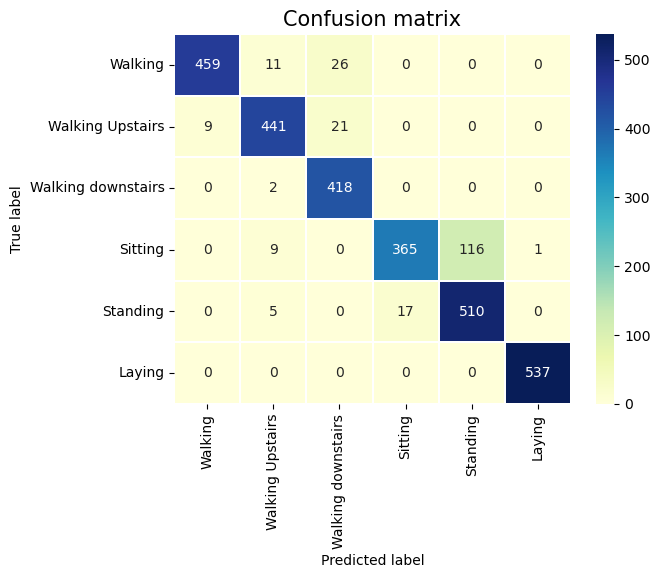

In [57]:
class_labels = ['Walking', 'Walking Upstairs', 'Walking downstairs', 'Sitting', 'Standing', 'Laying']

from sklearn.metrics import confusion_matrix

max_test = np.argmax(ytest, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Calculating accuracy for each variable







In [43]:
predictions = model.predict(xtest)

In [47]:
predictions = model.predict(xtest,verbose=0)
y_pred = np.argmax(predictions,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_input[:,0])/len(y_input))

2023-07-11 17:06:54.570088: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: required broadcastable shapes [Op:Equal]

In [58]:
max_test

array([4, 4, 4, ..., 1, 1, 1])

In [23]:
#DELETE FROM HERE ONWARDS

In [24]:
# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Project'
writer = tf.summary.create_file_writer(logdir)

In [58]:
#Create weight tensors
W = tf.Variable(tf.zeros([384,6]),name='W', dtype=tf.float32)  #weight
b = tf.Variable(tf.zeros([6]),name='b', dtype=tf.float32)   #offset

# #using softmax activation layer on a vector with 6 entries
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

    
# cross entropy loss function
@tf.function
def loss(x,y):
    y_ = y_pred(x)
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

#accuracy
def accuracy(x,y):
    y_ = y_pred(x)
    # calculate where the prediction equals the label
    correct = tf.math.equal(tf.math.argmax(y_,axis=-1),tf.math.argmax(y,axis=-1))
    # convert to a float (previously boolean)
    correct = tf.cast(correct,dtype=tf.float32)
    # return the mean to give the overall accuracy
    return tf.math.reduce_mean(correct)

In [59]:
# Selecting training parameters
n_iters = 3000
epochs = range(n_iters)

# learning rate
lr = 0.1

# gradient descent optimizer
optimizer = tf.keras.optimizers.Adam(lr) 


In [60]:
with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            current_loss = loss(x_input, y_input)
        gradients = tape.gradient(current_loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W ,b]))
        tf.summary.scalar('loss', current_loss, step=i)  # write to tensorboard
        train_acc = accuracy(x_input,y_input)
        val_acc = accuracy(X_val,y_val)
        tf.summary.scalar('train_acc', train_acc, step=i)  # write to tensorboard
        tf.summary.scalar('val_acc', val_acc, step=i)  # write to tensorboard
        if i%1000 == 0:
            print('Training Step:' + str(i) + '  Loss = ' + str(current_loss))
        # tf.print('val_acc', val_acc, output_stream=sys.stdout)

#plt.plot(loss_train)
#plt.show()

  0%|          | 0/3000 [00:00<?, ?it/s]

Training Step:0  Loss = tf.Tensor(1.7917595, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(1.5886203, shape=(), dtype=float32)
Training Step:2000  Loss = tf.Tensor(1.5879076, shape=(), dtype=float32)


## Part 2

In [ ]:
# 1‐dimensional convolutional neural network

Note: Your training data tensors will need to have their original shape of [n,128,3] so make sure to recreate the tensors after
you have completed part 1

In [12]:
#tensorboad set up
logdir = '/home/jovyan/logs/Project'

In [14]:
#Recreate the tensors
x_input, x_val, y_input, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)

#one-hot encoding for labels
y_input = tf.keras.utils.to_categorical(y_input)
y_val = tf.keras.utils.to_categorical(y_val)

print(xtrain.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(7352, 128, 3)
(2947, 128, 3)
(5881, 6)
(1471, 6)


In [15]:
# Convert your input and validation data to a tensor so that you can pass it into your classifier
x_input = tf.convert_to_tensor(x_input, tf.float32)
x_val = tf.convert_to_tensor(x_val, tf.float32)
y_input = tf.convert_to_tensor(y_input, tf.float32)
y_val = tf.convert_to_tensor(y_val, tf.float32)
print(xtrain.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(7352, 128, 3)
(2947, 128, 3)
(5881, 6)
(1471, 6)


2023-07-07 15:31:43.923340: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 15:31:44.495214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11560 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


In [17]:
# #Sequential model   (NOT TO USE BUT KEEP)
# model = tf.keras.Sequential(name="model_conv1D")

# model.add(tf.keras.layers.Input(shape=(128,3)))
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation=tf.nn.relu))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.GlobalAveragePooling1D())            ###check
# model.add(tf.keras.layers.Dense(6, activation='softmax'))      #how many units?

In [18]:
# #Compile model

# # Callbacks
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# # create a callback that will stop training if the validation loss hasn't improved for 2 epochs
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
# # initialize tqdm callback with default parameters
# tqdm_callback = tfa.callbacks.TQDMProgressBar()

# # compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
# loss='categorical_crossentropy',           
# metrics=['accuracy'])

# model.summary()

In [19]:
# # TO DO: add tqdm
# # TRAIN lOW FIRST
# # train the model
# fit = model.fit(x_input, y_input, 
#         epochs=500, 
#         verbose=0,  #what does this mean?
#         batch_size=128,
#         callbacks=[tensorboard_callback],
#         validation_data=(x_val, y_val))

# # plt.plot(np.array(fit.history['loss']), "r--", label = "Train loss")
# # plt.plot(np.array(fit.history['accuracy']), "g--", label = "Train accuracy")
# # plt.plot(np.array(fit.history['val_loss']), "r-", label = "Validation loss")
# # plt.plot(np.array(fit.history['val_accuracy']), "g-", label = "Validation accuracy")
# # plt.title("Training session's progress over iterations")
# # plt.legend(loc='lower left')
# # plt.ylabel('Training Progress (Loss/Accuracy)')
# # plt.xlabel('Training Epoch')
# # plt.ylim(0) 
# # plt.show()


In [17]:
# Keras API model

#We create the input layer and combine with further dense layers,
input_layer = tf.keras.Input(shape=(128, 3))

output_layer = tf.keras.layers.Conv1D(filters=32, kernel_size=4)(input_layer)
output_layer = tf.keras.layers.BatchNormalization()(output_layer)
output_layer = tf.keras.layers.Dense(64, activation='relu')(output_layer)
output_layer = tf.keras.layers.GlobalAveragePooling1D()(output_layer)

# # Add a softmax layer with  output units:
output_layer = tf.keras.layers.Dense(6, activation='softmax')(output_layer)


In [18]:
# Compile model

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs
early_stopping_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

model = tf.keras.Model(inputs=input_layer,outputs=output_layer)

#The compilation and training then proceeds as per the sequential model,
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 3)]          0         
                                                                 
 conv1d (Conv1D)             (None, 125, 32)           416       
                                                                 
 batch_normalization (BatchN  (None, 125, 32)          128       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 125, 64)           2112      
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 6)                 390   

In [130]:
predictions = model.predict(x_input,verbose=0)
y_pred = np.argmax(predictions,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_input[:,0])/len(y_input))

train accuracy:  0.0017003910899506887


In [131]:
predictions = model.predict(X_val,verbose=0)
y_pred = np.argmax(predictions,axis=-1)
print('val accuracy: ', np.sum(y_pred==y_val[:,0])/len(y_val))

val accuracy:  0.002719238613188307


In [40]:
##LSTM##
# https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (x_input.shape[1], x_input.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 124, activation='relu'))
# Softmax layer
model.add(Dense(y_input.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 124)               15996     
                                                                 
 dense_9 (Dense)             (None, 6)                 750       
                                                                 
Total params: 84,330
Trainable params: 84,330
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
5/5 [==============================] - 3s 275ms/step - loss: 1.7873 - accuracy: 0.2436 - val_loss: 1.7783 - val_accuracy: 0.2608
Epoch 2/100
5/5 [==============================] - 0s 96ms/step - loss: 1.7750 - accuracy: 0.2766 - val_loss: 1.7637 - val_accuracy: 0.2753
Epoch 3/100
5/5 [==============================] - 0s 94ms/step - loss: 1.7577 - accuracy: 0.3074 - val_loss: 1.7307 - val_accuracy: 0.3602
Epoch 4/100
5/5 [==============================] - 0s 92ms/step - loss: 1.7010 - accuracy: 0.3659 - val_loss: 1.5927 - val_accuracy: 0.3347
Epoch 5/100
5/5 [==============================] - 0s 93ms/step - loss: 1.5730 - accuracy: 0.3274 - val_loss: 1.4868 - val_accuracy: 0.3560
Epoch 6/100
5/5 [==============================] - 0s 98ms/step - loss: 1.4442 - accuracy: 0.3403 - val_loss: 1.2576 - val_accuracy: 0.3500
Epoch 7/100
5/5 [==============================] - 0s 90ms/step - loss: 1.2588 - accuracy: 0.3395 - val_loss: 1.1628 - val_accuracy: 0.3543
Epoch 8/100
5/5 [==

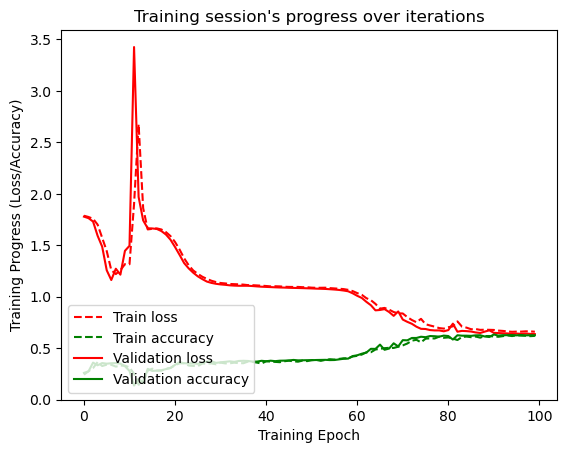

In [41]:
n_epochs = 100
batch_size = 1024 

history = model.fit(x_input, y_input, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()